In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('airline1.csv')

In [2]:
data.head()

,Day,Date,Number,Revenue
0,0,2021-01-01,8.3070,40.3805
1,1,2021-01-02,6.2528,30.1228
2,2,2021-01-03,8.6373,42.0469
3,3,2021-01-04,4.2026,20.0632
4,4,2021-01-05,3.5368,16.8350


In [13]:
data.isnull().sum()

,0
Day,0
Date,0
Number,0
Revenue,0
Cluster,0


In [4]:
data.describe()

,Day,Number,Revenue
count,1095.000000,1095.000000,1095.000000
mean,547.000000,16.800001,85.788072
std,316.243577,7.204594,39.217615
min,0.000000,0.358300,1.681200
25%,273.500000,11.285800,55.573050
50%,547.000000,16.096900,80.905100
75%,820.500000,22.021250,113.446200
max,1094.000000,37.755600,207.093600


In [5]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Convert Date column to datetime with inferred format
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

<ipython-input-5-2ec0565f3a94>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)


In [6]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Number', 'Revenue']])

In [7]:
# View the first few rows with cluster labels
print(data[['Number', 'Revenue', 'Cluster']].head())

# Group data by cluster and compute mean characteristics
cluster_summary = data.groupby('Cluster')[['Number', 'Revenue']].mean()
print(cluster_summary)

   Number  Revenue  Cluster
0  8.3070  40.3805        0
1  6.2528  30.1228        0
2  8.6373  42.0469        0
3  4.2026  20.0632        0
4  3.5368  16.8350        0
            Number     Revenue
Cluster                       
0         9.258004   45.366524
1        26.614117  139.923513
2        17.219167   87.077843


In [8]:
# Linear regression
X = data[['Number']]
y = data['Revenue']
model = LinearRegression().fit(X, y)

# Predictions and evaluation
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

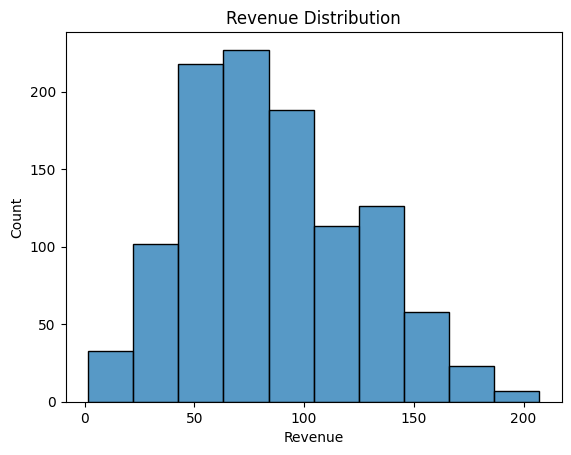

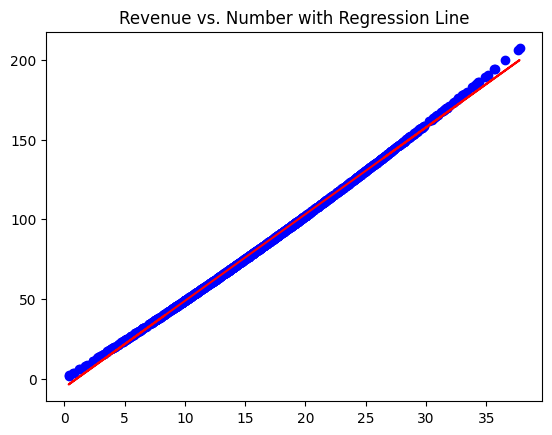

In [9]:
# Histogram of Revenue
sns.histplot(data['Revenue'], bins=10)
plt.title('Revenue Distribution')
plt.show()

# Scatter plot with regression line
plt.scatter(data['Number'], data['Revenue'], color='blue')
plt.plot(data['Number'], y_pred, color='red')
plt.title('Revenue vs. Number with Regression Line')
plt.show()

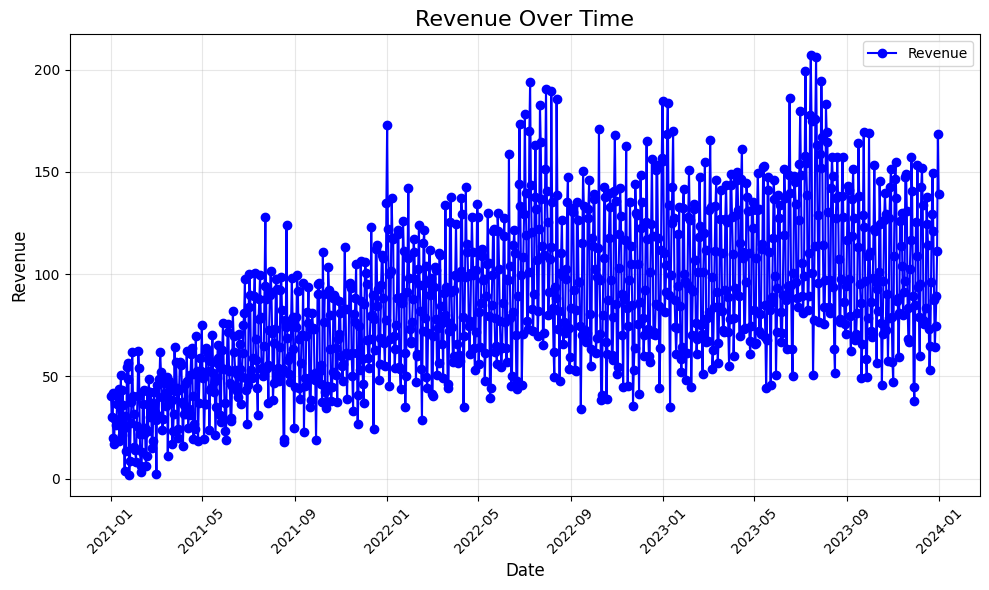

In [10]:
import matplotlib.pyplot as plt

# Plot Revenue over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Revenue'], marker='o', linestyle='-', color='blue', label='Revenue')
plt.title('Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

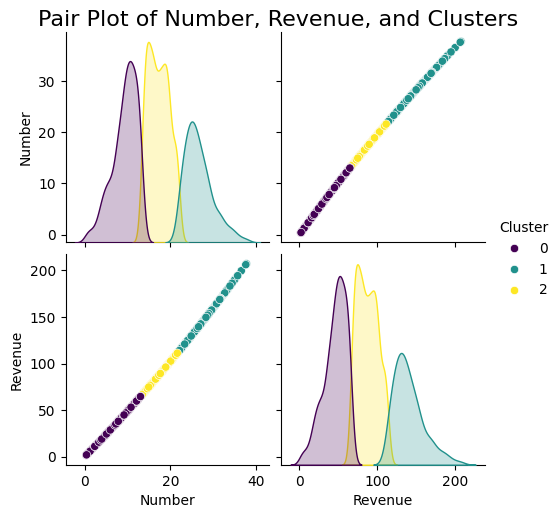

In [11]:
import seaborn as sns

# Pair plot to observe relationships between features
sns.pairplot(data[['Number', 'Revenue', 'Cluster']], hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Number, Revenue, and Clusters', y=1.02, fontsize=16)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = data[['Number']]  # Independent variable
y = data['Revenue']   # Dependent variable

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
intercept = model.intercept_
coefficient = model.coef_[0]
mse = mean_squared_error(y, y_pred)
r_squared = r2_score(y, y_pred)

# Print results
print("Regression Results:")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient (Slope): {coefficient:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Value: {r_squared:.4f}")

Regression Results:
Intercept: -5.6101
Coefficient (Slope): 5.4404
Mean Squared Error (MSE): 1.7203
R-squared Value: 0.9989
